# Hands-On Exercise 5.1:
# Decision Tree Classifiers
***

## Objectives

#### In this exercise, you will perform classification on structured data in Python. This exercise allows you to define a classification model on training data and evaluate the model against training data. The goal is to show you that classification models are typically built and tested before deployment.

### Overview

You will work on data detailing customer churn. You will:<br>
● Build a decision tree against a subset of the data (the training data)<br>
● Test the model against the remaing test data<br><br>

**Major Step 1: Data loading and exploration**

1. ❏ Import the **pandas** library. Import data from the file **custchurn.csv** and preview it

In [1]:
import pandas as pd
data = pd.read_csv('custchurn.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


2. ❏ Examine the number of churners vs. non-churners in the data.

In [2]:
data['churn'].value_counts()/data['churn'].count()

no     0.8586
yes    0.1414
Name: churn, dtype: float64

**Major Step 2: Splitting the data set into training and test data**

3. ❏ Randomize the data set<br><br>
*Hint: You will need to import the Numpy library*

In [3]:
import numpy as np
data_rand = data.iloc[np.random.RandomState(seed=0).permutation(len(data))]

4. ❏ Examine the first few rows in the randomized data set and compare to the
original.

In [4]:
data.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [ ]:
data_rand.head()

5. ❏ Remove the state and area_code columns from the randomized data set.

In [5]:
drop = ['state','area_code']
data_rand = data_rand.drop(drop,axis=1)

6. ❏ Recode the binary columns international_plan and voice_mail_plan.

In [6]:
yes_no_cols = ['international_plan','voice_mail_plan']
data_rand[yes_no_cols] = data_rand[yes_no_cols] == 'yes'
data_rand.head()

,Unnamed: 0,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
398,461,90,False,False,0,261.8,128,44.51,220.6,104,18.75,136.6,91,6.15,9.6,5,2.59,1,no
3833,4474,76,False,False,0,193.0,82,32.81,200.8,109,17.07,135.9,79,6.12,14.4,3,3.89,0,no
4836,3823,104,False,False,0,304.0,141,51.68,264.1,127,22.45,138.1,104,6.21,7.2,4,1.94,0,yes
4572,2077,95,True,False,0,228.9,134,38.91,255.7,71,21.73,208.0,120,9.36,10.1,2,2.73,4,yes
636,734,85,False,True,37,229.6,123,39.03,132.3,90,11.25,211.9,76,9.54,9.5,8,2.57,2,no


7. ❏ Split the data into 90 percent training data and 10 percent test data.

In [7]:
train = data_rand[0:4500]
test = data_rand[4501:5000]

8. ❏ Check that the proportion of classes in the target value has been maintained in
both the training and test data.

In [8]:
train["churn"].value_counts() / train["churn"].count()

no     0.857778
yes    0.142222
Name: churn, dtype: float64

In [9]:
test["churn"].value_counts() / test["churn"].count()

no     0.865731
yes    0.134269
Name: churn, dtype: float64

**Major Step 3: Building the classification model**

9. ❏ Specify the target and predictor variables.

In [10]:
target = train.churn
preds = train.drop('churn', axis=1)

10. ❏ Import **tree** and **export_graphviz** from sklearn

In [11]:
from sklearn import tree
from sklearn.tree import export_graphviz

11. ❏ Build the classification model, storing it in a variable called *clf*

In [12]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(preds, target)

12. ❏ Examine the model by typing its variable name *clf*

In [13]:
clf

DecisionTreeClassifier(criterion='entropy')

13. ❏ How many features (variables) were used to create the classifier?<br><br>
*Hint: Use the attribute **.n_features_** to see the number of features*

In [14]:
clf.n_features_

C:\Users\Evan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


18

14. ❏ Determine which are the most important attributes in the model with the attribute **.features_importances_**

In [15]:
pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = preds.columns).sort_values(['Imp'], ascending = False)

,Imp
total_day_charge,0.130960
number_customer_service_calls,0.116513
total_day_minutes,0.109205
international_plan,0.088274
total_intl_minutes,0.081808
total_eve_minutes,0.074943
total_intl_calls,0.062440
total_eve_charge,0.056758
total_night_charge,0.048524
Unnamed: 0,0.047755


14. ❏ Generate a graphic of the decision tree.

In [ ]:
with open('tree.dot', 'w') as dotfile: 
    export_graphviz(clf, 
                    dotfile, 
                    feature_names=preds.columns)

To view the graph, open a browser and navigate to url:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://www.webgraphviz.com/

Copy and paste the text from the newly generated file in step 14, **tree.dot** that has been created in your working directory **C:\1264**, into the text area, to view the decision tree

**Major Step 4: Testing the classification model**

14. ❏ Apply the decision tree model to the test data.

In [16]:
testTarget = test.churn
testPreds = test.drop('churn', axis=1)
target_pred = clf.predict(testPreds)

15. ❏ Compare the vector of predicted class values to the actual class values.

In [20]:
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(testTarget, target_pred)
conMat

array([[421,  11],
       [ 12,  55]], dtype=int64)

In [21]:
error_rate = (conMat[0][1] + conMat[1][0])/test.shape[0]
error_rate

correct_rate = (conMat[0][-0] + conMat[1][1])/test.shape[0]
correct_rate

0.9539078156312625

How accurate is the model when performed on the test data?

What was the error rate?

## <center>**Congratulations! You have successfully built and tested a classification model to predict whether customers are going to churn.**</center>

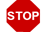

# <center>**This is the end of the exercise.**</center>